# Spin-Orbit Coupling
## Action by Leonard A. Gómez-García

In this chapter, we start by further examining the effects of a tidal torque on a satellite’s rotation.

For details on the theory please refer directly to the book:

> Murray, C. D., & Dermott, S. F. (1999). Solar system dynamics. Cambridge university press.

In [ ]:
#Packages
import numpy as np
import matplotlib.pyplot as plt

#Constants from packages
from scipy.constants import G

## 5.2 Tidal Despinning 

For small values of the satellite’s eccentricity e, the angle $\phi$ (Shown in book's Figure 5.1b) is given by:

$$
\phi \approx 2e \sin{nt}.
$$
The tidal torque acting to change the spin of the satellite is:

$$
N_{s} = -D \left( \frac{a}{r} \right)^{6}sign{(\dot{\eta}-\dot{\phi})}
$$

where

$$
D = \frac{3}{2} \frac{k_{2}}{Q_{s}} \frac{n_{4}}{\mathcal{G}} R_{s}^{5}
$$

and is a positive constant, and $Q_{s}$, $k_{2}$, and $\tau(\mathrm{y})$ are the tidal dissipation function,
Love number, and radius of the satellite, respectively. A positive torque will act
to increase the spin of the satellite, $\dot{\eta}$.

| Body | Type | Perturber | $k_2$ | $Q$ | $\tau(\mathrm{y})$ |
| :--- | :--- | :--- | :--- | ---: | :--- |
| Mercury | rocky | Sun | $(0.1)$ | $(100)$ | $4 \times 10^9$ |
| Venus | rocky | Sun | $0.25$ | $(100)$ | $6 \times 10^{10}$ |
| Earth | rocky | Sun | $0.299$ | $ 12 $ | $5 \times 10^{10}$ |
| Mars | rocky | Sun | $0.14$ | $ 86 $ | $7 \times 10^{12}$ |
| Earth | rocky | Moon | $0.299$ | $ 12 $ | $1 \times 10^{10}$ |
| Moon | rocky | Earth | $0.030$ | $ 27 $ | $2 \times 10^7$ |
| Phobos | rocky | Mars | $(0.0000004)$ | $(100)$ | $3 \times 10^5$ |
| Io | rocky | Jupiter | $(0.03)$ | $(100)$ | $2 \times 10^3$ |
| Europa | rocky | Jupiter | $(0.02)$ | $(100)$ | $4 \times 10^4$ |
| Hyperion | icy | Saturn | $(0.0003)$ | $(100)$ | $1 \times 10^9$ |
| Miranda | icy | Uranus | $(0.0009)$ | $(100)$ | $8 \times 10^3$ |
| Ariel | icy | Uranus | $(0.10)$ | $(100)$ | $1 \times 10^4$ |
| Triton | icy | Neptune | $(0.086)$ | $(100)$ | $4 \times 10^4$ |
| Charon | icy | Pluto | $(0.006)$ | $(100)$ | $6 \times 10^5$ |
| Pluto | icy | Charon | $(0.06)$ | $(100)$ | $1 \times 10^7$ |

**To improve:** Instead of defining values, create a table with the parameters above including radius (maybe recall SPICE kernels or using API?) and load it in the code.

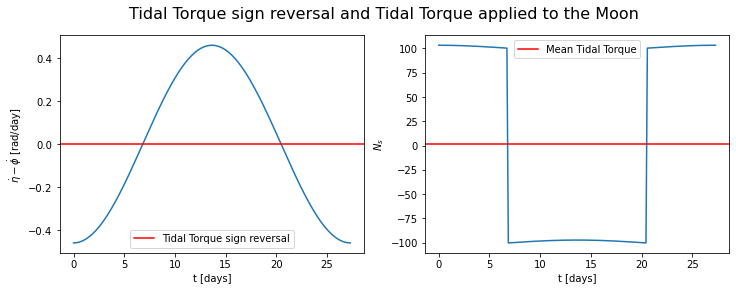

In [5]:
"""Calculations of the mean Tidal torque for the Earth-Moon system."""

#Time and true anomaly arrays
t = np.linspace(0, 27.3, 200)
f = np.linspace(0, 2*np.pi, 200)

#Values
k2 = 0.030
Qs = 27
Rs = 1.7e6/6.3e6
a = 380e6
ecc = 0.005
r = a*(1 - ecc**2)/(1 + ecc*np.cos(f))
n = 2*np.pi/27.3 
eta_dot = 0
e = 1
phi_dot = 2*e*n*np.cos(n*t)
sign_reversal = eta_dot - phi_dot

#Computing the Tidal Torque
D = 3/2*k2/Qs*n**4/G*Rs**5
Ns = -D*(a/r)**6*np.sign(sign_reversal)
delta = 0
Mean_Ns = 2*D/np.pi*(4*ecc*np.cos(delta) - delta)


fig, ax = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('Tidal Torque sign reversal and Tidal Torque applied to the Moon', fontsize=16)
ax[0].plot(t, sign_reversal)
ax[0].axhline(0.0, color='red', 
               label='Tidal Torque sign reversal')
ax[0].set(xlabel='t [days]', 
           ylabel='$\dot{\eta}-\dot{\phi}$ [rad/day]')
ax[0].legend()

#Plot the Tidal torque function
ax[1].plot(t, Ns)
ax[1].set(xlabel='t [days]', 
           ylabel='$N_s$')
ax[1].axhline(Mean_Ns, color='red', 
               label='Mean Tidal Torque')
ax[1].legend();

As we can see, the Mean Tidal Torque for the Moon is almost 0 (could be more accurate using more accurate parameters), which means that the Moon is at an equilibrium state (because most satellites are at least partially solid and have permanent quadrupole moments, that is, permanent bulges or departures from sphericity.).